In [108]:
%run ../src/utils.py
import json
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw

In [70]:
# locations

train_dir = '../data/train_images/'
train_dir_ims = train_dir + 'images/'

val_dir = '../data/val_images/'
val_dir_ims = val_dir + 'images/'

train_ims = !ls {train_dir_ims}
val_ims = !ls {val_dir_ims}

In [71]:
train_masks_loc = !ls {train_dir}*.json
train_masks_loc = train_masks_loc[1]

val_masks_loc = !ls {val_dir}*.json
val_masks_loc = val_masks_loc[1]

In [72]:
train_masks_json = json.loads(open(train_masks_loc).read())
train_masks_df = pd.DataFrame(train_masks_json['annotations'])

train_image_ids = train_masks_df.image_id.unique()
train_masks = train_masks_df.groupby('image_id')

In [ ]:
train_masks_json = json.loads(open(train_masks_loc).read())
train_masks_df = pd.DataFrame(train_masks_json['annotations'])

train_image_ids = train_masks_df.image_id.unique()
train_masks = train_masks_df.groupby('image_id')

In [86]:
N_train = len(train_image_ids)

In [115]:
masks = train_masks.get_group(np.random.randint(N_train)).segmentation.values
masks

array([list([[294.0, 184.0, 299.0, 184.0, 299.0, 235.0, 276.0, 235.0, 275.0, 184.0, 275.0, 177.0, 294.0, 176.0, 294.0, 184.0]]),
       list([[143.0, 81.0, 180.0, 69.0, 183.0, 84.0, 181.0, 84.0, 184.0, 98.0, 186.0, 97.0, 189.0, 111.0, 197.0, 108.0, 203.0, 135.0, 157.0, 149.0, 152.0, 125.0, 147.0, 126.0, 143.0, 105.0, 147.0, 104.0, 150.0, 103.0, 148.0, 96.0, 146.0, 97.0, 143.0, 98.0, 140.0, 82.0, 143.0, 81.0]]),
       list([[243.0, 5.694607616035192e-15, 250.0, 12.000000000000005, 231.0, 29.000000000000004, 227.0, 21.000000000000004, 217.0, 4.000000000000004, 210.0, 10.000000000000004, 220.0, 27.000000000000004, 198.0, 46.0, 173.0, 1.4083438190194562e-15, 243.0, 5.694607616035192e-15]]),
       list([[299.0, 9.123618653647781e-15, 299.0, 9.000000000000009, 287.0, 9.000000000000009, 287.0, 17.000000000000007, 268.0, 18.000000000000007, 268.0, 10.000000000000007, 268.0, 7.225416114969383e-15, 299.0, 9.123618653647781e-15]]),
       list([[200.0, 168.0, 231.0, 185.0, 236.0, 172.0, 256.0, 

In [121]:
def masks_array(masks, width = 300, height = 300):
    
    img = Image.new('L', (width, height), 0)
    for mask in masks:
        ImageDraw.Draw(img).polygon(mask[0], outline=1, fill=1)
    masks_array = np.array(img)
    
    return masks_array

masks_array(mask) for mask in train_masks.groups

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [122]:
train_masks.groups

Exception ignored in: <bound method Image.__del__ of <PIL.Image.Image image mode=L size=300x300 at 0x2AD11A7B8>>
Traceback (most recent call last):
  File "/Users/joshuagreenhalgh/.local/share/virtualenvs/crowdAI_mapping_challange-9v1TNnfv/lib/python3.6/site-packages/PIL/Image.py", line 586, in __del__
    def __del__(self):
KeyboardInterrupt


{0: Int64Index([1807084], dtype='int64'),
 1: Int64Index([  46645,  186561,  461884,  736135,  891802, 1307468, 1442158,
             1818895, 1962833, 1985655, 2094799, 2198939],
            dtype='int64'),
 2: Int64Index([  73371,  166437,  329608,  334082,  392566,  491199,  559718,
              581366,  779595,  876236, 1104802, 1414887, 1577641, 1906860,
             1960421],
            dtype='int64'),
 3: Int64Index([ 220359,  626026, 1246534, 1256199, 1306729, 1636497, 2146254,
             2230211, 2285343, 2305969],
            dtype='int64'),
 4: Int64Index([2193312], dtype='int64'),
 5: Int64Index([598493, 972303, 1890691], dtype='int64'),
 6: Int64Index([648019, 1863449], dtype='int64'),
 7: Int64Index([284068, 2190625], dtype='int64'),
 8: Int64Index([  76961,  176670,  383974,  392898,  528528,  530324,  631380,
              636728,  682180,  714343,  852614,  973135, 1217509, 1302714,
             1344772, 1410254, 2086201],
            dtype='int64'),
 9: Int64Index

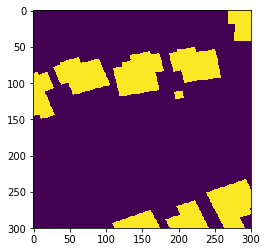

In [109]:
width = height = 300
img = Image.new('L', (width, height), 0)
for polygon in masks:
    ImageDraw.Draw(img).polygon(polygon[0], outline=1, fill=1)

masks = np.array(img)
plt.imshow(masks)

In [111]:
masks

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)